# Smoothing particles

In [1]:
# Libraries ----
import sys  # type: ignore
import warnings

import imageio  # type: ignore
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

sys.path.append("../modules")
import plot_clustering as plt_cp  # type: ignore
import plot_smoothing as plt_sp  # type: ignore
import plot_tracking as plt_tp  # type: ignore
import smoothing_particles as sp  # type: ignore
import track_particles as tp  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option("display.max_columns", None)

## Global variables

In [2]:
input_path = "../input_files"
output_path = "../output_files"
log_path = "../logs"
input_generation_date = "2025-02-18"

ordering = True
video_name = "3n_2m_1f_240219_1"
n_particles = int(video_name[0])
save_figures = True
x_bounds = [0, 1080]
y_bounds = [70, 1850]
x_zoom = [0, 1080]
y_zoom = [0, 1920]

## Load tracked data

In [3]:
df_tracked = pd.read_csv(
    "{}/clustered_{}.csv".format(output_path, video_name), low_memory=False
)
df_tracked.head(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,0,0,120.145605,264.010191,121.014025,264.957801,NaN,120.145605,264.010191,NaN,120.145605,264.010191,-0.339188,7850.0,186.367623,116.741012,0.779500,3,NaN,NaN,NaN,NaN,False,False,False
1,1,0,1193.183921,970.228535,1185.783301,969.802004,0.0,1233.000000,929.000000,0.619608,1190.000000,1004.000000,-1.512143,13359.0,211.169999,84.729031,0.915975,3,NaN,NaN,NaN,NaN,False,False,False
2,2,0,362.334075,1001.592320,365.038276,1000.183289,0.0,379.000000,955.000000,0.584314,248.000000,1033.000000,-1.385676,10339.0,214.129294,75.964701,0.934957,3,NaN,NaN,NaN,NaN,False,False,False


In [4]:
df_tracked.tail(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
54102,0,54108,411.261457,138.624404,418.859111,141.122814,NaN,411.261457,138.624404,NaN,411.261457,138.624404,0.994291,16366.0,227.885661,95.908294,0.907125,3,3.0,0.000000,0.000000,0.0,False,False,False
54103,1,54108,103.937733,175.211873,106.404131,169.395393,0.0,138.000000,41.000000,0.596078,97.000000,260.000000,-0.303302,9652.0,317.863068,108.348453,0.940112,3,3.0,0.000000,0.000000,0.0,False,False,False
54104,2,54108,602.050618,914.877265,596.417294,913.532001,NaN,557.611044,825.230120,NaN,507.679026,854.449164,1.233569,10698.0,175.108815,93.269742,0.846343,3,3.0,0.016165,0.005281,0.0,False,False,False


## Swapping mixed IDs

In [5]:
omega_threshold = 20 * np.pi / 180  # Angular velocity per frame (in degrees)
velocity_threshold = 83  # Velocity per frame limited with half average size of particle
print("Thresholds:\n\t- Velocity:", velocity_threshold, "\n\t- Angle:", omega_threshold * 180 / np.pi, "\n")
delta = 400

from importlib import reload
reload(sp)

arg_list = [
    # VIDEO 1
    [0    , 10000, velocity_threshold, omega_threshold, True],
    [10000, 20000, velocity_threshold, omega_threshold, True],
    [20000, 30000, velocity_threshold, omega_threshold, True],
    [30000, 40000, velocity_threshold, omega_threshold, True],
    [40000, 50000, velocity_threshold, omega_threshold, True],
    [50000, 54110, velocity_threshold, omega_threshold, True]#,
    # [60000, 70000, velocity_threshold, omega_threshold, True],
    # [70000, 80000, velocity_threshold, omega_threshold, True],
    # [80000, 90000, velocity_threshold, omega_threshold, True],
    # [90000, 100000, velocity_threshold, omega_threshold, True],
    # [100000, 108000, velocity_threshold, omega_threshold, True]
]

df_final = sp.smooth_frames(
    df_tracked=df_tracked,
    arg_list=arg_list,
    order=False,
    log_path=log_path,
    log_filename="log_{}".format(video_name),
    verbose=1,
    tqdm_bar=True
)

df_final.head(8)

Thresholds:
	- Velocity: 83 
	- Angle: 20.0 



100%|█████████████████████████| 6/6 [00:30<00:00,  5.17s/it]


Time: 30000 Chunks 2 Allowed time 30000 Permutation [0 1 2]


,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,True,0,chunk_00000_10000,0,0,120.145605,264.010191,121.014025,264.957801,NaN,120.145605,264.010191,NaN,120.145605,264.010191,-0.339188,-0.339188,7850.0,186.367623,116.741012,0.779500,3,NaN,NaN,NaN,NaN,False,False,False
1,True,0,chunk_00000_10000,1,1,1193.183921,970.228535,1185.783301,969.802004,0.0,1233.000000,929.000000,0.619608,1190.000000,1004.000000,-1.512143,-1.512143,13359.0,211.169999,84.729031,0.915975,3,NaN,NaN,NaN,NaN,False,False,False
2,True,0,chunk_00000_10000,2,2,362.334075,1001.592320,365.038276,1000.183289,0.0,379.000000,955.000000,0.584314,248.000000,1033.000000,-1.385676,-1.385676,10339.0,214.129294,75.964701,0.934957,3,NaN,NaN,NaN,NaN,False,False,False
3,True,3,chunk_00000_10000,0,0,118.129614,261.839169,120.049992,262.174697,NaN,118.129614,261.839169,NaN,118.129614,261.839169,-0.690351,-0.690351,399.0,225.037823,145.742978,0.761948,3,3.0,-0.671997,-0.723674,-0.117054,False,False,False
4,True,3,chunk_00000_10000,1,1,1193.357442,970.083022,1185.977590,969.685029,0.0,1185.000000,929.000000,0.654902,1210.000000,998.000000,-1.509430,-1.509430,13370.0,211.516828,84.825293,0.916063,3,3.0,0.057840,-0.048504,0.000904,False,False,False
5,True,3,chunk_00000_10000,2,2,372.556078,999.891813,375.453078,998.374357,0.0,358.000000,955.000000,0.584314,326.000000,1039.000000,-1.343745,-1.343745,9576.0,165.168481,78.123037,0.881068,3,3.0,3.407334,-0.566836,0.013977,False,False,False
6,True,6,chunk_00000_10000,0,0,131.555746,287.398866,131.641112,292.510445,NaN,131.555746,287.398866,NaN,131.555746,287.398866,0.355817,-0.355817,296.0,212.194687,102.650936,0.875202,3,3.0,4.475377,8.519899,-0.111512,False,False,False
7,True,6,chunk_00000_10000,1,1,1193.438551,969.548877,1185.956885,969.133267,0.0,1181.000000,929.000000,0.666667,1139.000000,998.000000,-1.513794,-1.513794,13442.0,211.894372,85.307659,0.915378,3,3.0,0.027036,-0.178048,-0.001455,False,False,False


In [6]:
df_final.tail(5)

,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
54100,True,54105,chunk_50000_54110,1,1,103.937733,175.211873,106.404131,169.395393,0.0,138.000000,41.000000,0.596078,97.000000,260.000000,-0.303302,-0.303302,9652.0,317.863068,108.348453,0.940112,3,3.0,0.000000,0.000000,0.0,False,False,False
54101,True,54105,chunk_50000_54110,2,2,602.002122,914.861424,596.354475,913.509415,NaN,558.222088,826.460240,NaN,545.358051,854.898327,1.233569,1.233569,10698.0,175.108815,93.269742,0.846343,3,3.0,-0.011240,-0.007574,0.0,False,False,False
54102,True,54108,chunk_50000_54110,0,0,411.261457,138.624404,418.859111,141.122814,NaN,411.261457,138.624404,NaN,411.261457,138.624404,0.994291,0.994291,16366.0,227.885661,95.908294,0.907125,3,3.0,0.000000,0.000000,0.0,False,False,False
54103,True,54108,chunk_50000_54110,1,1,103.937733,175.211873,106.404131,169.395393,0.0,138.000000,41.000000,0.596078,97.000000,260.000000,-0.303302,-0.303302,9652.0,317.863068,108.348453,0.940112,3,3.0,0.000000,0.000000,0.0,False,False,False
54104,True,54108,chunk_50000_54110,2,2,602.050618,914.877265,596.417294,913.532001,NaN,557.611044,825.230120,NaN,507.679026,854.449164,1.233569,1.233569,10698.0,175.108815,93.269742,0.846343,3,3.0,0.016165,0.005281,0.0,False,False,False


## Interpolation over not allowed frames

In [7]:
if ordering:
    df_full = df_final.copy().sort_values(["time", "permuted_id"])
    for id_ in range(len(df_full["permuted_id"].unique())):
        mask = df_full.loc[:, "permuted_id"] == df_full["permuted_id"].unique()[id_]
        df_full[mask] = df_full[mask].interpolate(method="linear")

In [8]:
if ordering:
    cols = [
        "id",
        "permuted_id",
        "time",
        "position_x",
        "position_y",
        "weighted_x",
        "weighted_y",
        "darkest_v",
        "darkest_x",
        "darkest_y",
        "lightest_v",
        "lightest_x",
        "lightest_y",
        "orientation",
        "corrected_orientation",
        "area",
        "axis_major",
        "axis_minor",
        "eccentricity",
    ]
    df_temp = df_full[cols]
    df_temp.to_csv(
        "{}/interpolated_{}.csv".format(output_path, video_name), index=False
    )
    df_temp

Thresholds:
	- Velocity: 15.661377234300888 
	- Angle: 10.421458374996321 



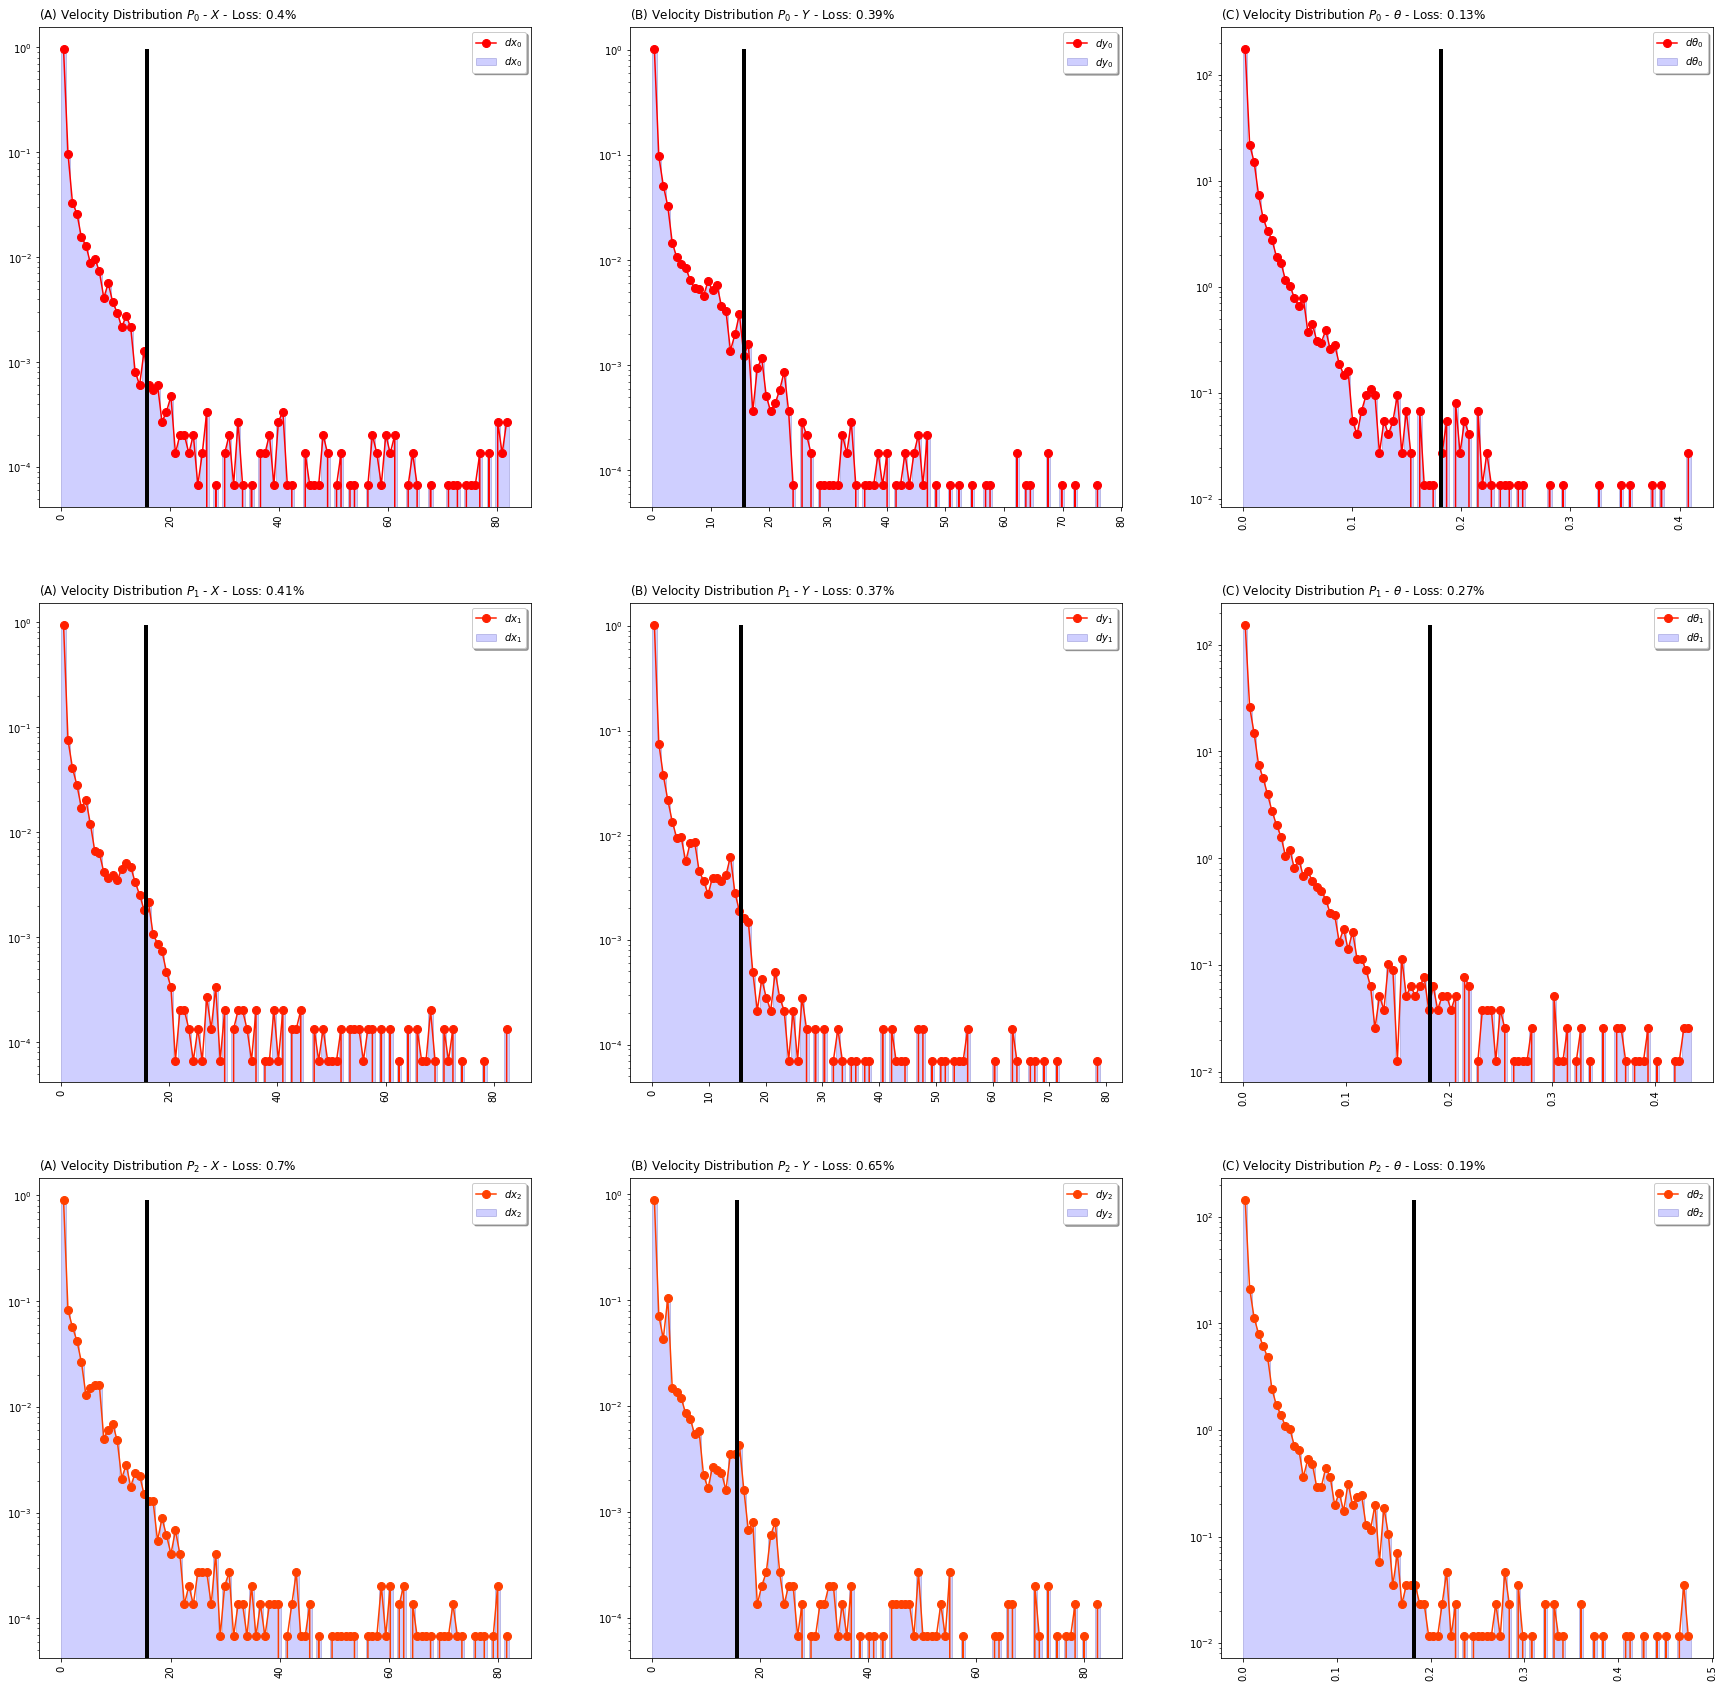

In [9]:
if ordering:
    bins = 100
    width = 10
    fancy_legend = True
    omega_threshold = (
        df_full["velocity_orientation"].abs().quantile(0.9965)
    )  # Angular velocity per frame
    velocity_threshold = (
        df_full["velocity_x"].abs().quantile(0.9901)
    )  # Velocity per frame limited with half average size of particle
    print(
        "Thresholds:\n\t- Velocity:",
        velocity_threshold,
        "\n\t- Angle:",
        omega_threshold * 180 / np.pi,
        "\n",
    )

    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_cp.plot_velocities_distribution(
        df_tracked=df_smooth,
        bins=bins,
        velocity_threshold=velocity_threshold,
        omega_threshold=omega_threshold,
        width=width,
        fancy_legend=fancy_legend,
    )

Original


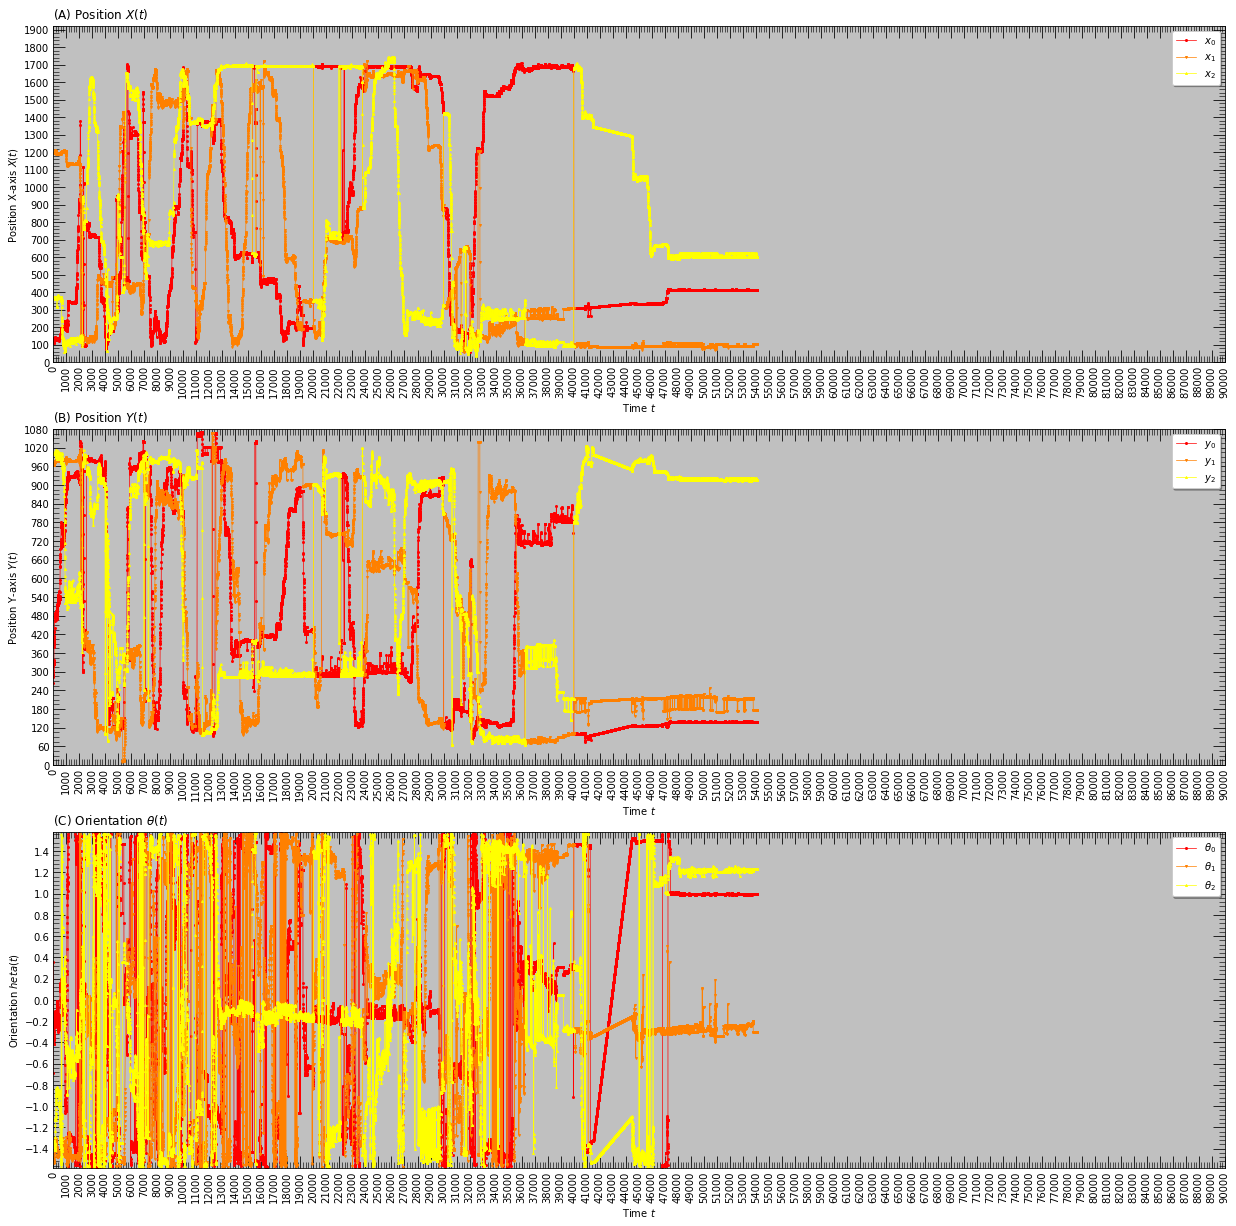

Corrected Orientation


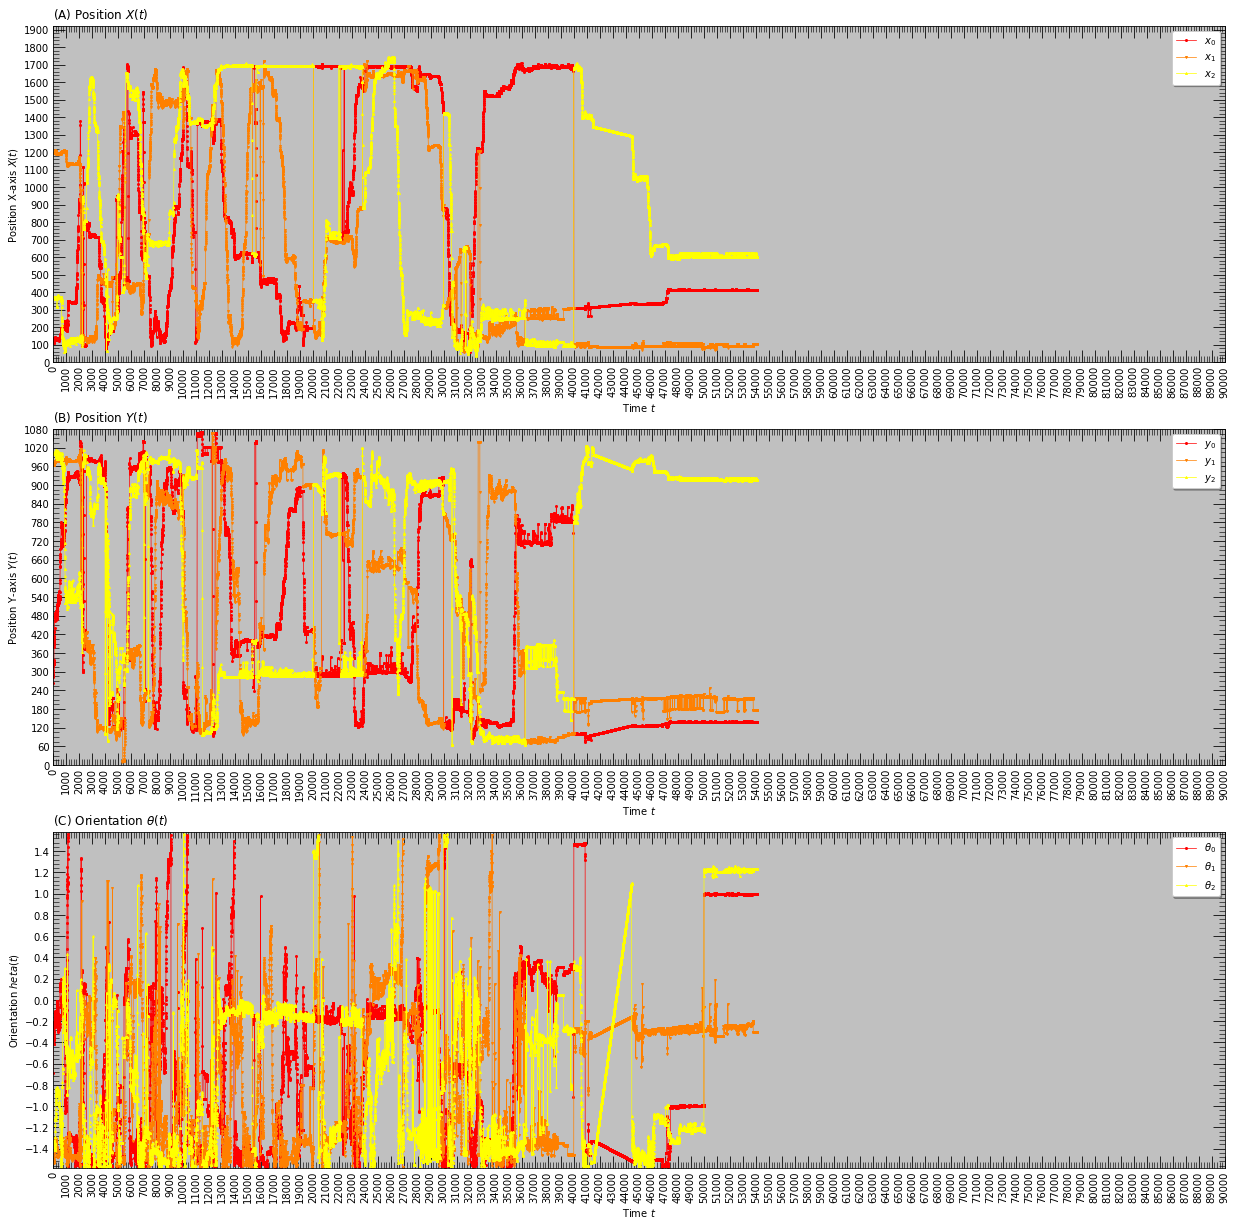

In [10]:
if ordering:
    width = 21
    n_x_breaks = 100
    n_y_breaks = 20
    t0, tf = 0, 90000  # 22200, 24300
    t0_, tf_ = 0, 90000  # 22200, 24300
    t_bounds = [t0_, tf_]
    p_bounds = [[0, 1920], [0, 1080], [-1.58, 1.58]]
    fancy_legend = True

    print("Original")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    velocity_threshold = (
        df_full["velocity_x"].abs().quantile(0.9701)
    )  # Velocity per frame limited with half average size of particle
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[
            (
                (df_smooth["velocity_x"] <= velocity_threshold)
                & (df_smooth["velocity_y"] <= velocity_threshold)
            )
        ],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend,
    )

    print("Corrected Orientation")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[
            (
                (df_smooth["velocity_x"] <= velocity_threshold)
                & (df_smooth["velocity_y"] <= velocity_threshold)
            )
        ],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend,
    )

## Setting video information

In [11]:
# # Load the video
# reader = imageio.get_reader("{}/{}.mp4".format(input_path, video_name), "ffmpeg")

# # Check the number of frames
# num_frames = reader.count_frames()
# print("Total frames: {}".format(num_frames))

# # Extract a frame to inspect the content
# time = 0
# frame = reader.get_data(time)
# print("Frames resolution: {} x {}".format(frame.shape[0], frame.shape[1]))

## Comparative of process

In [12]:
# # Original frame
# time = 209  #271  # 209  # 80
# times = [time - 1, time, time + 1]
# reinforce_boundaries = True
# remove_holes = False
# type = "local equalized"
# clip_limit = 0.05
# threshold = 0.19
# sigma = 1.5
# x_bounds = x_bounds  # [40, 1020]
# y_bounds = y_bounds  # [160, 1740]
# region_area_min = 200
# axis_major_min = 94
# eccentricity_max = 0.99


# df_tracked_frame_0 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[0], reader.get_data(times[0])]
# )

# df_tracked_frame_1 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[1], reader.get_data(times[1])]
# )

# df_tracked_frame_2 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[2], reader.get_data(times[2])]
# )

# df_tracked_old = pd.concat([df_tracked_frame_0, df_tracked_frame_1, df_tracked_frame_2], ignore_index=True)

# width = 10
# n_x_breaks = 20
# n_y_breaks = 20
# fancy_legend = True
# x_legend = 1.001
# y_legend = 0.891

# df_smooth = df_full.copy()
# df_smooth["id"] = df_smooth["permuted_id"]
# df_smooth["orientation"] = df_smooth["corrected_orientation"]

# fig = plt_sp.plot_all_process_frame(
#     reader=reader,
#     times=times,
#     df_tracked=df_tracked_old,
#     df_clustered=df_tracked,
#     df_smoothed=df_smooth,
#     width=width,
#     n_x_breaks=n_x_breaks,
#     n_y_breaks=n_y_breaks,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     fancy_legend=fancy_legend,
#     x_legend=x_legend,
#     y_legend=y_legend
# )